# statistical ananlysis of brain size
Reading from brain__size.csv and data as a data frame

In [23]:
import matplotlib
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


imports the NumPy library,Creates an array of 20 evenly spaced values between -6 and 6.
Evaluates functions across a range of inputs.Computes the sine of each value in the t array, Computes the cosine of each value in the t array and **expose them as panda data frame**

In [24]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})  

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


This line of code calculates the **average VIQ for female participants** in the dataset.

In [25]:
data.shape    
data.columns  
print(data['Gender'])   
data[data['Gender'] == 'Female']['VIQ'].mean()

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


np.float64(109.45)

**average VIQ** separately for **males and females** in the dataset.

In [26]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


**mean of the each categorical variable according to the gender**

In [27]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


 *average value of MRI counts expressed in log units, for males and females*

In [28]:
data['Log_MRI_Count'] = np.log(data['MRI_Count'])
avg_Log_MRI_by_gender = data.groupby('Gender')['Log_MRI_Count'].mean()
print(avg_Log_MRI_by_gender)

Gender
Female    13.665830
Male      13.767731
Name: Log_MRI_Count, dtype: float64


plotting the **scatter matrix** for **MRI count,Height,Weight** using **matplotlib**

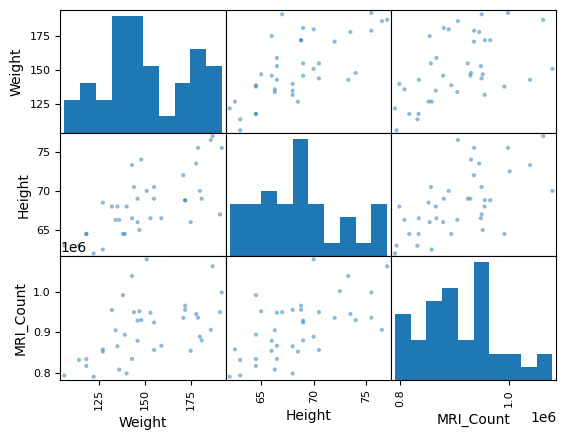

In [29]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]) 
plt.show()

**scatter plot matrix for PIQ,VIQ,FSIQ**

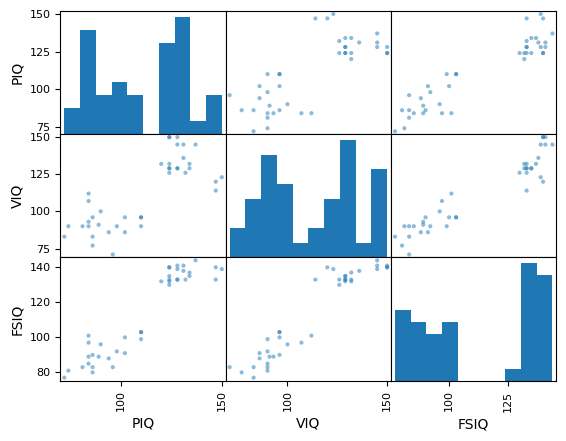

In [30]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
plt.show()

*Scatterplot matrix for Females and Male weight, height MRI count*

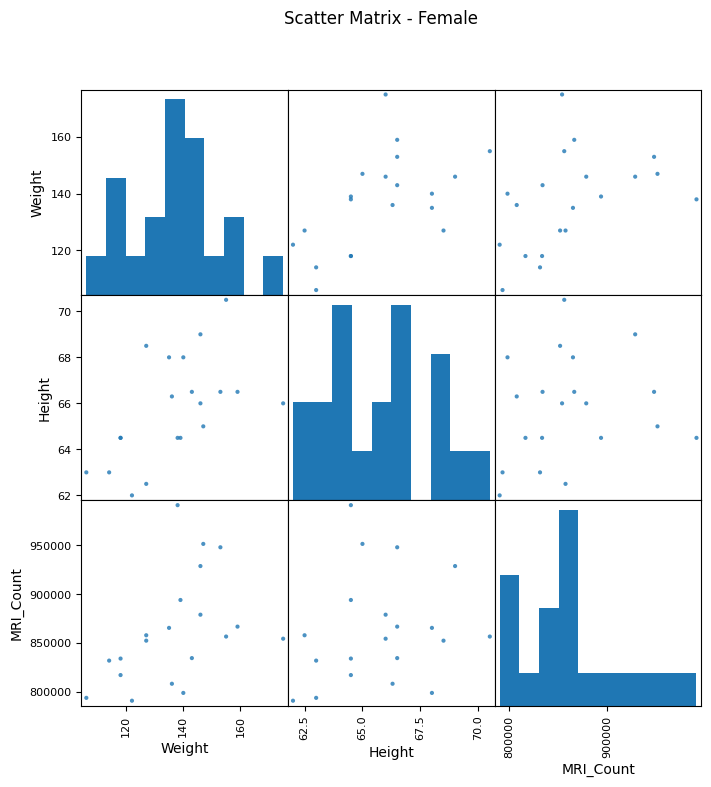

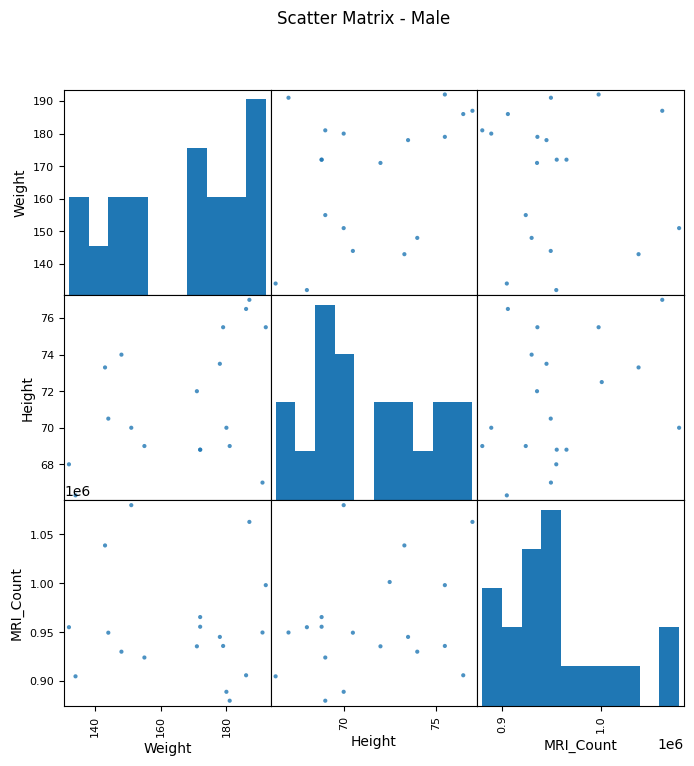

In [31]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(
    data[data['Gender'] == 'Female'][['Weight', 'Height', 'MRI_Count']],
    figsize=(8, 8),
    alpha=0.8
)
plt.suptitle("Scatter Matrix - Female")
plt.show()
scatter_matrix(
    data[data['Gender'] == 'Male'][['Weight', 'Height', 'MRI_Count']],
    figsize=(8, 8),
    alpha=0.8
)
plt.suptitle("Scatter Matrix - Male")
plt.show()

 **one-sample t-test** to determine whether the average Verbal IQ (VIQ) in our dataset is significantly different from a given value using **scipy**

In [32]:
from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)   

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

Test the significance between the mean VIQ for male and female populations, **2 sample t-test with scipy**

In [33]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq) 

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

independent t-test comparing FSIQ and PIQ: using **2 sample test**

In [34]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

**paired t-test** to determine if there is a significant difference between FSIQ and PIQ scores measured on the same individuals:

In [35]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

**One-Sample t-Test** on the Difference Between FSIQ and PIQ

In [36]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

**Wilcoxon signed ranked test**

In [37]:
stats.wilcoxon(data['FSIQ'], data['PIQ']) 

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

 *non parametric statistics **Mann-Whitney U** to test the difference between VIQ in males and females*

In [39]:
from scipy.stats import mannwhitneyu
viq_male = data[data['Gender'] == 'Male']['VIQ'].dropna()
viq_female = data[data['Gender'] == 'Female']['VIQ'].dropna()
result = mannwhitneyu(viq_male, viq_female, alternative='two-sided')
print(result)

MannwhitneyuResult(statistic=np.float64(235.5), pvalue=np.float64(0.3422886868727315))


Importing **numpy** aand **generate data** according to the model

In [66]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x': x, 'y': y})



**OLS model**

In [41]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        22:33:56   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

comparison between **IQ of male and female** using **linear model**

In [42]:

data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.445
Time:                        22:35:21   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

comparing FSIQ and PIQ scores using linear Regression
**long form** table, listing IQs where the type os IQ is indicated by categorical variable

In [43]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  
model = ols("iq ~ type", data_long).fit()
print(model.summary())  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.643
Time:                        22:37:19   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  c

**t-test** and **corresponding p-values** for the effect of the type of iq

In [46]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

# iris dataset for linear models
This model uses **iris dataset**
define linear regression model where **septal width is a dependent variable** and name of the **species and petal length as dependepent variables** using **OLS**

In [48]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        22:45:23   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

This model estimates **separate coefficients for each species **(using dummy variables), as well as for sepal width.
We then formulate a **contrast to directly compare the coefficients for the two species**
**ANOVA**

In [50]:
print(model.f_test([0, 1, -1, 0])) 

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


*test if the VIQ of male and female are different after removing the effect of brain size, height and weight*

In [51]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols('VIQ ~ Gender + FSIQ + PIQ', data).fit()
print(model.summary()) 
print(model.f_test([0, 1, -1, 0]))  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     826.7
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           3.07e-33
Time:                        22:50:06   Log-Likelihood:                -97.790
No. Observations:                  40   AIC:                             203.6
Df Residuals:                      36   BIC:                             210.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.9940      2.408      7.

# seaborn for statistical analysis
data from 'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
        'wages.txt'        

In [53]:
import urllib
import os
import matplotlib.pyplot as plt
import pandas
import pandas

if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve(
        'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
        'wages.txt'
    )


names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, engine='python' )
data.columns = short_names
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])
print(data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

We use **seaborn.pairplot()** to explore pairwise relationships between numeric variables in the dataset. we visualize the **relationships between WAGE, AGE, and EDUCATION**

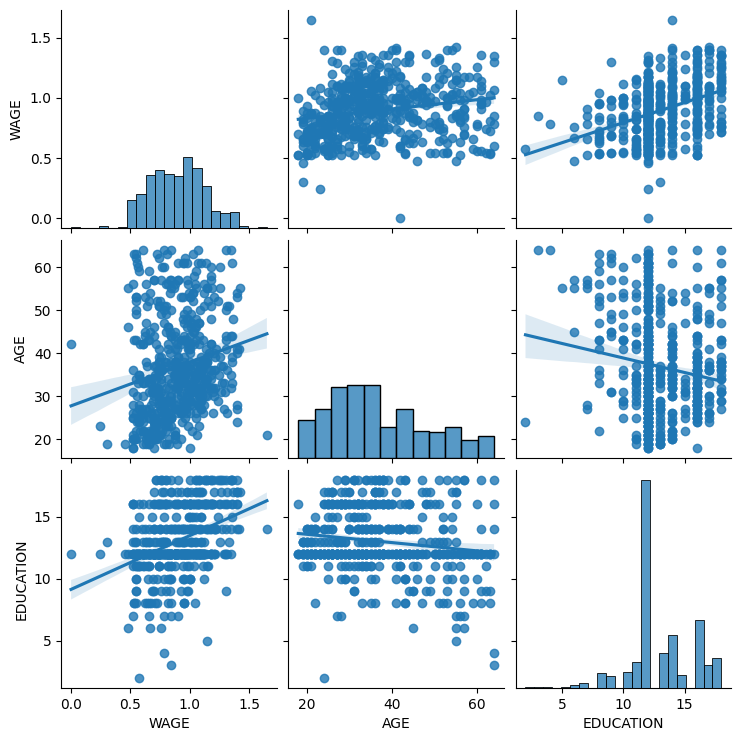

In [56]:
import seaborn
                 kind='reg')  

**We use seaborn.pairplot()** to visualize relationships between numerical variables, and differentiate the **data by gender using the hue parameter**

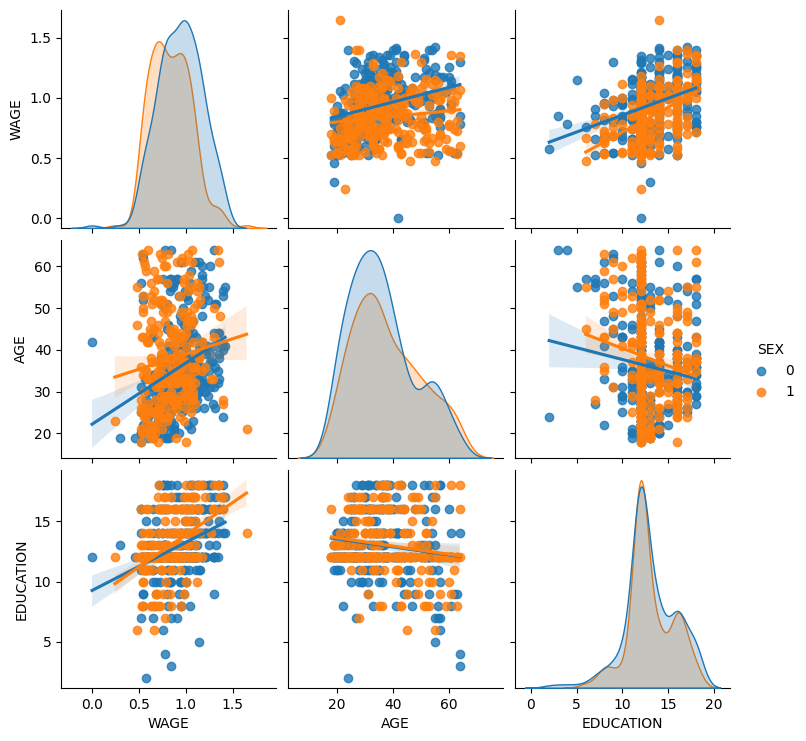

In [63]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')

A **regression** capturing the **relation between one variable and another wage and education** plotted using seaborn.lmplot

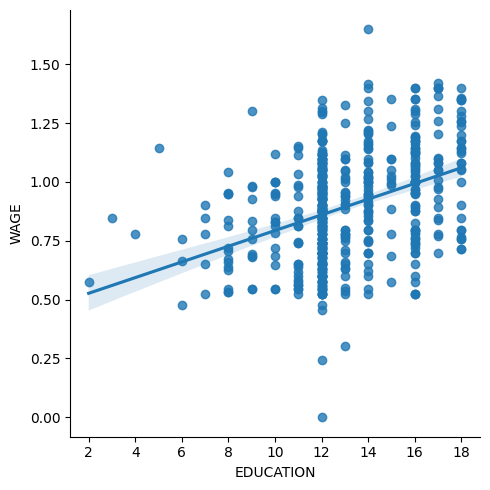

In [84]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

**Regression Analysis** Wage ~ Education + Gender + Interaction Term. **OLS** regression model to investigate the effect of education and gender on wages, including their interaction.



In [65]:
import statsmodels.formula.api as sm
result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
print(result.summary())   

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        23:02:42   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861